In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [153]:
data=pd.read_csv('BigMart_TrainData.csv')

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [10]:
lreg = LinearRegression()

In [13]:
###splitting into training and cv for cross validation

X = data.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,data.Item_Outlet_Sales)


In [15]:
###training the model

lreg.fit(x_train,y_train)

##predicting on cv

pred = lreg.predict(x_cv)

In [18]:
###calculating mse

mse = np.mean((pred - y_cv)**2)
mse

2014228.9966191605

In [19]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff


,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.359533
1,Item_MRP,15.388443


In [20]:
#Now let us check the r-square for the above model.

lreg.score(x_cv,y_cv)


0.3350760201933304

# Another Model with more independent Variable

In [25]:
X = data.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]


In [26]:
##splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,data.Item_Outlet_Sales)

In [27]:
lreg.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [32]:
## Lets Do Imputation
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)

In [33]:
##Let us try to run the model again.


## splitting into training and cv for cross validation
X = data.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

x_train, x_cv, y_train, y_cv = train_test_split(X,data.Item_Outlet_Sales)

In [34]:
## training the model 
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
##predicting on cv 
pred = lreg.predict(x_cv)

In [36]:
##calculating mse

mse = np.mean((pred - y_cv)**2)

mse

1956589.3437912392

In [37]:
## calculating coefficients

coeff = DataFrame(x_train.columns)

In [38]:

coeff['Coefficient Estimate'] = Series(lreg.coef_)

In [39]:
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-8.367672
1,Item_MRP,15.380166
2,Item_Weight,-2.373466


In [41]:
##calculating r-square

lreg.score(x_cv,y_cv) 


0.3503872415935789

# Lets Use All the Features Now

In [90]:
# imputing missing values
data=pd.read_csv('BigMart_TrainData.csv')

data['Item_Visibility'] = data['Item_Visibility'].replace(0,np.mean(data['Item_Visibility']))

data['Outlet_Establishment_Year'] = 2013 - data['Outlet_Establishment_Year']

data['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values

mylist = list(data.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(data[mylist], prefix= mylist)

data.drop(mylist, axis=1, inplace = True)

X = pd.concat([data,dummies], axis =1 )

X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,15,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,26,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [95]:
X.dropna(inplace=True)
#X1 = X.drop('Item_Outlet_Sales',1)
#X1.dropna()

In [124]:
X1 = X.drop('Item_Outlet_Sales',1)
Y1=X.Item_Outlet_Sales

In [131]:
x_train, x_cv, y_train, y_cv = train_test_split(X1,X.Item_Outlet_Sales, test_size =0.3)

In [128]:
#x_train,y_train
model = sm.OLS(y_train,x_train)
results = model.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4.405
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          7.38e-283
Time:                        18:55:05   Log-Likelihood:                -40554.
No. Observations:                4942   AIC:                         8.419e+04
Df Residuals:                    3403   BIC:                         9.420e+04
Df Model:                        1538                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weigh

In [129]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  Item_Weight                        1.586542e+01
Item_Visibility                    1.054583e+02
Item_MRP                          -1.851143e+01
Outlet_Establishment_Year          1.393806e+02
Item_Identifier_DRA12              2.865870e+02
Item_Identifier_DRA24              1.487775e+02
Item_Identifier_DRA59              1.162465e+03
Item_Identifier_DRB01              6.582389e-10
Item_Identifier_DRB13              1.281804e+03
Item_Identifier_DRB24              1.494436e+03
Item_Identifier_DRB25             -1.103013e+03
Item_Identifier_DRB48             -3.409234e+03
Item_Identifier_DRC01             -2.564922e+03
Item_Identifier_DRC12              7.902799e+02
Item_Identifier_DRC13             -8.596304e+02
Item_Identifier_DRC24              1.251262e+03
Item_Identifier_DRC25             -1.385181e+03
Item_Identifier_DRC27              2.350061e+03
Item_Identifier_DRC36              8.730581e+01
Item_Identifier_DRC49              1.275681e+02
Item_Identifier_DRD01      

In [140]:
y_Predicted=results.predict(x_cv)

In [141]:
mse = np.mean((y_Predicted - y_cv)**2)
mse


1140249.7933679398

In [144]:
results.rsquared_adj

0.5145338997385462

In [151]:
results.rsquared

0.665646399678258

Text(0.5,1,'Residual plot')

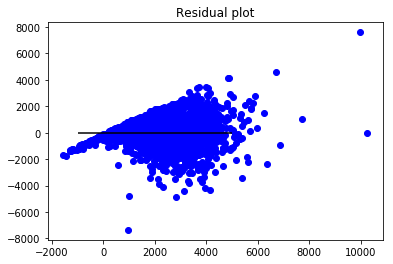

In [152]:
##residual plot
import matplotlib.pyplot as plt
%matplotlib inline

x_plot = plt.scatter(y_Predicted, (y_Predicted - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

# We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant'